# Random Forest Model

# Preparing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('duzce_cleaned_data.csv')

In [3]:
df

,Building_height,Building_age,Torsional_irregularity,Projection_in_plan,Minimum_normalized_lateral_stiffness_index,Minimum_normalized_lateral_strength_index,Overhanging_ratio,Normalized_redundancy_score,Priority_index,PGA,PGV/PGA,Effective_SaT1,Class
0,12.00,24.0,1,2,0.091896,3.005807,0.114932,1,0.013702,1.195908,0.074858,0.897751,M
1,11.20,19.0,2,2,0.079054,2.256757,0.152568,2,0.010158,1.195908,0.074858,0.916526,M
2,11.20,8.0,2,2,0.068851,1.717742,0.202016,1,0.007218,1.195908,0.074858,0.754786,M
3,16.20,14.0,2,2,0.043574,1.690346,0.071803,2,0.005137,1.195908,0.074858,0.604847,M
4,16.20,14.0,2,2,0.036941,1.207469,0.120498,1,0.009077,1.195908,0.074858,0.604847,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,8.55,18.0,2,2,0.053323,2.306667,0.039771,3,0.020086,1.195908,0.074858,0.868699,M
479,11.20,3.0,1,2,0.158659,2.896653,0.075902,1,0.010472,1.195908,0.074858,0.754786,M
480,11.20,5.0,2,2,0.198931,2.655852,0.170534,2,0.009189,1.195908,0.074858,0.754786,L
481,11.20,5.0,2,2,0.175697,2.605994,0.167368,2,0.009430,1.195908,0.074858,0.754786,L


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Select inputs and target

# Location by index
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
X

,Building_height,Building_age,Torsional_irregularity,Projection_in_plan,Minimum_normalized_lateral_stiffness_index,Minimum_normalized_lateral_strength_index,Overhanging_ratio,Normalized_redundancy_score,Priority_index,PGA,PGV/PGA,Effective_SaT1
0,12.00,24.0,1,2,0.091896,3.005807,0.114932,1,0.013702,1.195908,0.074858,0.897751
1,11.20,19.0,2,2,0.079054,2.256757,0.152568,2,0.010158,1.195908,0.074858,0.916526
2,11.20,8.0,2,2,0.068851,1.717742,0.202016,1,0.007218,1.195908,0.074858,0.754786
3,16.20,14.0,2,2,0.043574,1.690346,0.071803,2,0.005137,1.195908,0.074858,0.604847
4,16.20,14.0,2,2,0.036941,1.207469,0.120498,1,0.009077,1.195908,0.074858,0.604847
...,...,...,...,...,...,...,...,...,...,...,...,...
478,8.55,18.0,2,2,0.053323,2.306667,0.039771,3,0.020086,1.195908,0.074858,0.868699
479,11.20,3.0,1,2,0.158659,2.896653,0.075902,1,0.010472,1.195908,0.074858,0.754786
480,11.20,5.0,2,2,0.198931,2.655852,0.170534,2,0.009189,1.195908,0.074858,0.754786
481,11.20,5.0,2,2,0.175697,2.605994,0.167368,2,0.009430,1.195908,0.074858,0.754786


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 56)

In [8]:
X_train.shape, X_test.shape

((386, 12), (97, 12))

In [9]:
X_train

,Building_height,Building_age,Torsional_irregularity,Projection_in_plan,Minimum_normalized_lateral_stiffness_index,Minimum_normalized_lateral_strength_index,Overhanging_ratio,Normalized_redundancy_score,Priority_index,PGA,PGV/PGA,Effective_SaT1
187,14.25,3.0,2,2,0.173243,1.585854,0.308289,1,0.004945,1.195908,0.074858,0.653230
270,8.25,10.0,2,2,0.155046,2.653266,0.169548,2,0.010369,1.205237,0.074942,0.878057
273,8.70,4.0,2,2,0.133317,2.706989,0.114919,1,0.013320,1.204091,0.074943,0.864178
44,13.50,19.0,2,2,0.106978,1.965828,0.080686,2,0.006453,1.195908,0.074858,0.674768
293,11.20,12.0,2,2,0.189502,4.322654,0.120824,1,0.015801,1.209780,0.074933,0.754786
...,...,...,...,...,...,...,...,...,...,...,...,...
235,8.40,6.0,1,1,0.120482,2.064018,0.113858,1,0.012724,1.188657,0.074936,1.000000
418,14.00,7.0,2,2,0.083495,1.970405,0.119159,1,0.007019,1.159555,0.074825,0.660204
192,16.80,7.0,1,2,0.171838,1.830868,0.202245,1,0.005915,1.195908,0.074858,0.591792
399,18.00,10.0,1,1,0.377627,2.186836,0.113858,2,0.011086,1.176957,0.074904,0.743179


# Dealing with Categorical Values

# Label Encoding

In [10]:
# Used for musticlass target variable.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
le.fit(y_train)

LabelEncoder()

In [12]:
le.classes_

array(['C/R', 'L', 'M', 'N', 'S'], dtype=object)

In [13]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [14]:
y_train

array([0, 1, 2, 3, 2, 2, 2, 1, 1, 4, 1, 2, 2, 1, 2, 4, 2, 4, 2, 3, 4, 1,
       2, 1, 0, 2, 2, 2, 4, 2, 2, 0, 2, 0, 2, 0, 3, 3, 4, 2, 1, 2, 3, 2,
       3, 2, 2, 1, 2, 4, 3, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 4, 1, 1, 1,
       4, 4, 1, 2, 0, 3, 3, 4, 1, 1, 2, 1, 3, 2, 2, 2, 2, 2, 0, 2, 2, 3,
       2, 3, 0, 4, 0, 1, 0, 4, 4, 1, 2, 3, 0, 2, 4, 2, 1, 1, 2, 1, 4, 4,
       2, 2, 4, 3, 1, 2, 0, 3, 1, 2, 1, 1, 3, 4, 1, 1, 4, 4, 1, 0, 3, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 4, 2, 4, 1, 1, 3, 1, 4, 2, 1, 2,
       3, 1, 3, 1, 4, 4, 4, 0, 0, 1, 1, 2, 0, 0, 1, 3, 2, 1, 0, 4, 1, 0,
       4, 2, 3, 3, 1, 3, 3, 3, 1, 1, 4, 2, 2, 0, 1, 1, 1, 2, 2, 4, 0, 1,
       4, 1, 3, 3, 0, 2, 1, 4, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 1, 3, 0, 4,
       1, 0, 3, 3, 1, 2, 2, 1, 1, 3, 0, 2, 2, 0, 3, 1, 0, 2, 0, 3, 1, 3,
       2, 1, 3, 0, 2, 0, 0, 2, 3, 1, 1, 3, 1, 1, 2, 3, 1, 0, 0, 1, 3, 4,
       1, 1, 0, 2, 1, 1, 3, 0, 1, 0, 2, 1, 2, 0, 3, 1, 1, 4, 1, 2, 2, 4,
       1, 4, 1, 1, 4, 2, 1, 4, 1, 1, 1, 2, 1, 4, 0,

In [15]:
y_test

array([1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 4, 0, 2, 1, 1, 2, 1, 1, 1,
       0, 4, 3, 1, 1, 2, 4, 0, 4, 1, 0, 3, 2, 2, 0, 2, 3, 2, 2, 2, 2, 1,
       2, 0, 1, 3, 2, 2, 4, 2, 0, 2, 1, 1, 1, 2, 1, 1, 4, 3, 2, 3, 2, 1,
       4, 1, 1, 1, 1, 1, 3, 1, 2, 4, 1, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 4, 2, 3, 0, 0, 3, 1])

# Feature Scaling (Standardization)

In [16]:
# Feature scaling shoud be done after data splitting.There should be no influence on test data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,:-1] = sc.fit_transform(X_train.iloc[:,:-1])

# Not using fit method so that model doesn't know the mean and standard deviation of the test dataset

X_test.iloc[:,:-1] = sc.transform(X_test.iloc[:,:-1])

In [17]:
X_train

,Building_height,Building_age,Torsional_irregularity,Projection_in_plan,Minimum_normalized_lateral_stiffness_index,Minimum_normalized_lateral_strength_index,Overhanging_ratio,Normalized_redundancy_score,Priority_index,PGA,PGV/PGA,Effective_SaT1
187,1.017980,-0.146702,0.974420,0.340010,0.211307,-1.024047,3.286302,-0.623172,-1.216134,0.017712,-0.070883,0.653230
270,-1.250226,-0.077641,0.974420,0.340010,0.103375,0.193059,0.951810,0.775342,-0.401027,0.720345,0.328695,0.878057
273,-1.080111,-0.136836,0.974420,0.340010,-0.025509,0.254316,0.032623,-0.623172,0.042524,0.634070,0.335866,0.864178
44,0.734454,0.011152,0.974420,0.340010,-0.181730,-0.590786,-0.543386,0.775342,-0.989458,0.017712,-0.070883,0.674768
293,-0.135025,-0.057909,0.974420,0.340010,0.307745,2.096562,0.131972,-0.623172,0.415386,1.062528,0.284847,0.754786
...,...,...,...,...,...,...,...,...,...,...,...,...
235,-1.193521,-0.117104,-1.026251,-2.941088,-0.101637,-0.478826,0.014771,-0.623172,-0.047104,-0.528416,0.302500,1.000000
418,0.923472,-0.107238,0.974420,0.340010,-0.321015,-0.585566,0.103958,-0.623172,-0.904456,-2.720372,-0.230764,0.660204
192,1.981968,-0.107238,-1.026251,0.340010,0.202974,-0.744672,1.501982,-0.623172,-1.070301,0.017712,-0.070883,0.591792
399,2.435609,-0.077641,-1.026251,-2.941088,1.423567,-0.338783,0.014771,0.775342,-0.293234,-1.409640,0.146989,0.743179


In [18]:
X_test

,Building_height,Building_age,Torsional_irregularity,Projection_in_plan,Minimum_normalized_lateral_stiffness_index,Minimum_normalized_lateral_strength_index,Overhanging_ratio,Normalized_redundancy_score,Priority_index,PGA,PGV/PGA,Effective_SaT1
97,-2.176411,0.090079,-1.026251,0.340010,-0.622277,-0.077721,0.122539,2.173856,0.144734,-0.698284,-2.736524,0.975957
167,-0.135025,-0.107238,-1.026251,0.340010,0.060195,-0.303897,0.258540,-0.623172,-0.461245,0.017712,-0.070883,0.754786
66,-0.286239,-0.146702,0.974420,0.340010,-0.054469,0.001726,1.428988,-0.623172,-0.914037,0.017712,-0.070883,0.771437
442,0.923472,-0.126970,0.974420,0.340010,0.679002,-0.311285,1.198192,-0.623172,-1.135556,0.017712,-0.070883,0.660204
294,-1.080111,0.021018,0.974420,0.340010,-0.628405,-1.045358,1.081222,0.775342,-1.084468,1.062528,0.284847,0.864178
...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.923472,-0.097373,0.974420,0.340010,-0.632005,-0.412955,0.014771,2.173856,0.292564,0.017712,-0.070883,0.857180
204,0.016189,0.040750,-1.026251,0.340010,-0.287000,0.450925,-0.521539,-0.623172,-1.038896,0.017712,-0.070883,0.906928
223,0.923472,-0.166434,-1.026251,-2.941088,0.165395,-0.310699,-1.809561,-0.623172,-0.801635,0.017712,-0.070883,0.660204
389,-1.193521,0.109811,-1.026251,0.340010,0.595522,2.294978,0.014771,0.775342,1.923114,-0.686366,0.281788,0.873324


# Creating Model

In [19]:
clf = RandomForestClassifier(max_samples=0.75,random_state=42)

In [20]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.75, random_state=42)

In [21]:
y_pred = clf.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.4329896907216495

# Cross Validation

In [23]:
# For class imbalanced dataset applying stratified K-Fold cross validation

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=10,scoring='accuracy'))


0.46211734693877543

# Hyperparameter Tuning

# GridSearchCV

In [24]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]


In [25]:
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'max_samples': max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [26]:
rf = RandomForestClassifier()

In [27]:

from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf,
                      param_grid = param_grid,
                      cv = 10,
                      verbose = 2,
                      n_jobs = -1)

In [28]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [29]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 100}

In [30]:
rf_grid.best_score_

0.5495276653171389

# Model Evaluation


In [31]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.42      0.42        12
           1       0.47      0.44      0.45        32
           2       0.43      0.56      0.49        34
           3       0.44      0.40      0.42        10
           4       0.00      0.00      0.00         9

    accuracy                           0.43        97
   macro avg       0.35      0.36      0.36        97
weighted avg       0.40      0.43      0.41        97



In [32]:
# Confusion Matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 5  0  7  0  0]
 [ 1 14 15  2  0]
 [ 4  8 19  2  1]
 [ 0  5  0  4  1]
 [ 2  3  3  1  0]]


In [33]:
labels = ['C/R', 'L', 'M', 'N', 'S']
labels.sort()


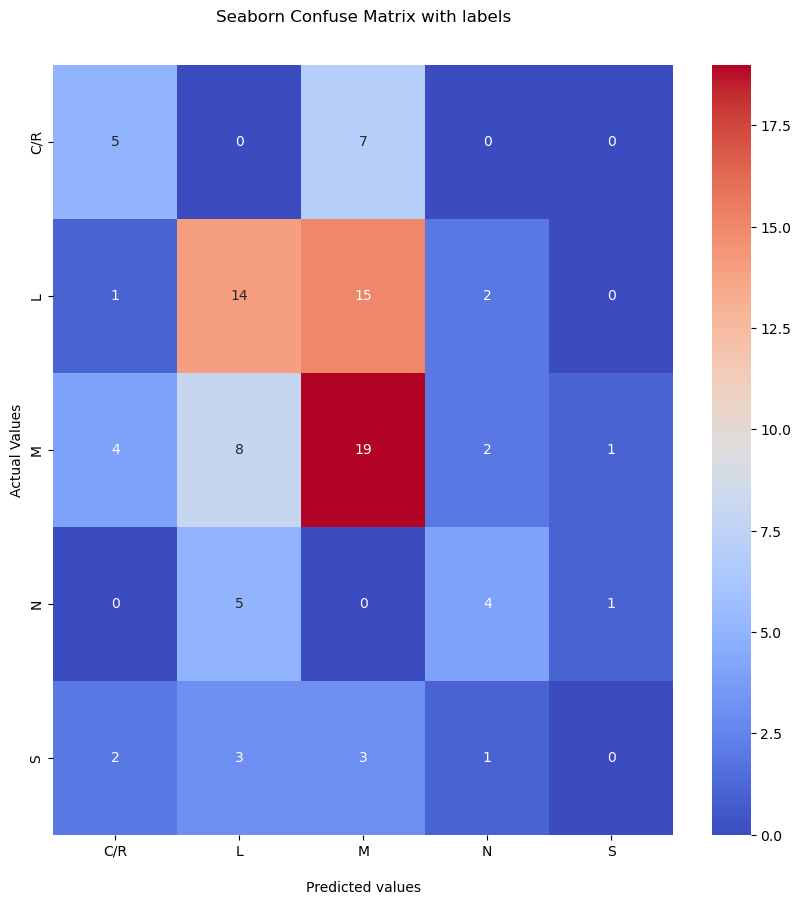

In [34]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='.0f',
                xticklabels=labels, yticklabels=labels)

ax.set_title('Seaborn Confuse Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual Values');

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf_2 = DecisionTreeClassifier(max_depth=4, random_state = 42)

In [37]:
clf_2 = clf_2.fit(X_train, y_train)

In [38]:
clf_2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [39]:
y_pred_2 = clf_2.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred_2)

0.4536082474226804

In [41]:
# Hyperparameter Tuning and Cross Validation

param_dict = {'max_depth': [2, 3, 5, 10, 20, None],
             'criterion': ["gini", "entropy"],
             'min_samples_leaf': [5, 10, 20, 50, 100]
             }
print(param_dict)

{'max_depth': [2, 3, 5, 10, 20, None], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 20, 50, 100]}


In [42]:
dt_grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                      param_grid = param_dict,
                      cv = 10,
                      verbose = 2,
                      n_jobs = -1)

In [43]:
dt_grid.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [44]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}

In [45]:
dt_grid.best_score_

0.4716599190283401

In [46]:
# Classification Report

print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.10      0.08      0.09        12
           1       0.56      0.44      0.49        32
           2       0.43      0.68      0.53        34
           3       0.62      0.50      0.56        10
           4       1.00      0.11      0.20         9

    accuracy                           0.45        97
   macro avg       0.54      0.36      0.37        97
weighted avg       0.51      0.45      0.43        97



In [47]:
# Confusion Matrix

cf_matrix = confusion_matrix(y_test, y_pred_2)
print(cf_matrix)

[[ 1  0 11  0  0]
 [ 2 14 14  2  0]
 [ 5  5 23  1  0]
 [ 0  3  2  5  0]
 [ 2  3  3  0  1]]


In [48]:
labels = ['C/R', 'L', 'M', 'N', 'S']
labels.sort()


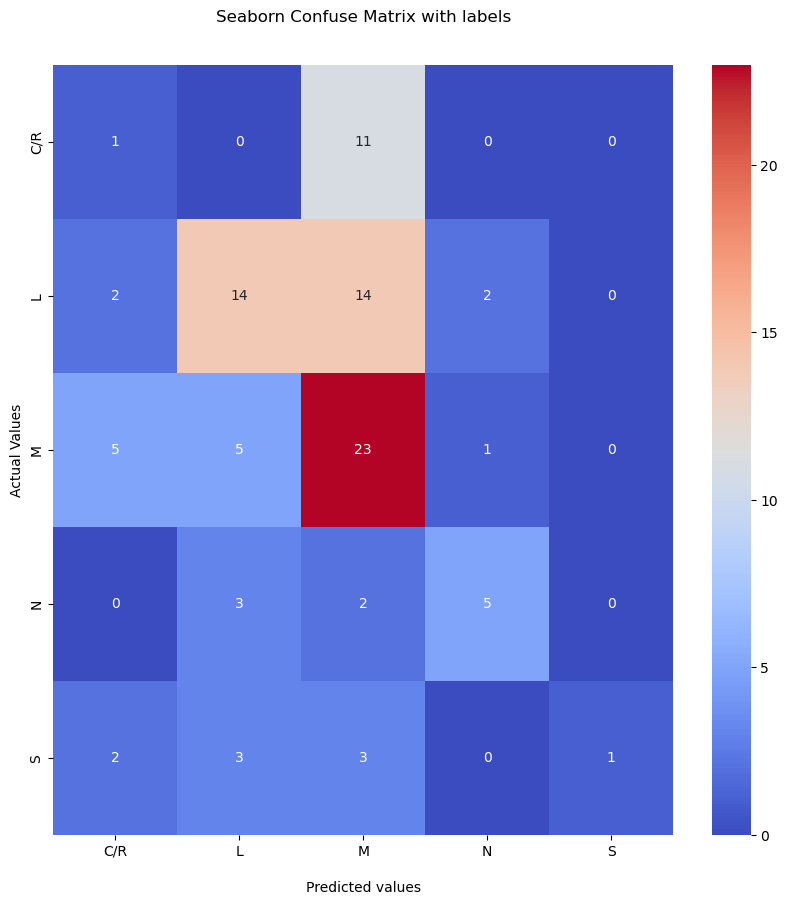

In [49]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='.0f',
                xticklabels=labels, yticklabels=labels)

ax.set_title('Seaborn Confuse Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual Values');

# Support_Vector_Machine

In [50]:
from sklearn.svm import SVC

In [51]:
model = SVC(random_state = 42)

In [52]:
clf = model.fit(X_train, y_train)

In [53]:
y_pred = clf.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.4845360824742268

In [55]:
# Hyperparameter Tuning and Cross Validation

param_dict = {'C': [0.1,1,10,100],
             'gamma': [1,0.1,0.01,0.001],
             'kernel': ['rbf', 'linear', 'poly']
             }
print(param_dict)

{'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}


In [56]:
svm_grid = GridSearchCV(estimator = SVC(),
                      param_grid = param_dict,
                      cv = 10,
                      verbose = 2,
                      n_jobs = -1)

In [57]:
svm_grid.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=2)

In [58]:
svm_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [59]:
svm_grid.best_score_

0.510391363022942

In [60]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.51      0.59      0.55        32
           2       0.45      0.56      0.50        34
           3       0.57      0.40      0.47        10
           4       0.00      0.00      0.00         9

    accuracy                           0.48        97
   macro avg       0.40      0.39      0.39        97
weighted avg       0.44      0.48      0.46        97



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# Confusion Matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 5  0  7  0  0]
 [ 1 19 10  2  0]
 [ 5 10 19  0  0]
 [ 0  4  2  4  0]
 [ 0  4  4  1  0]]


In [62]:
labels = ['C/R', 'L', 'M', 'N', 'S']
labels.sort()

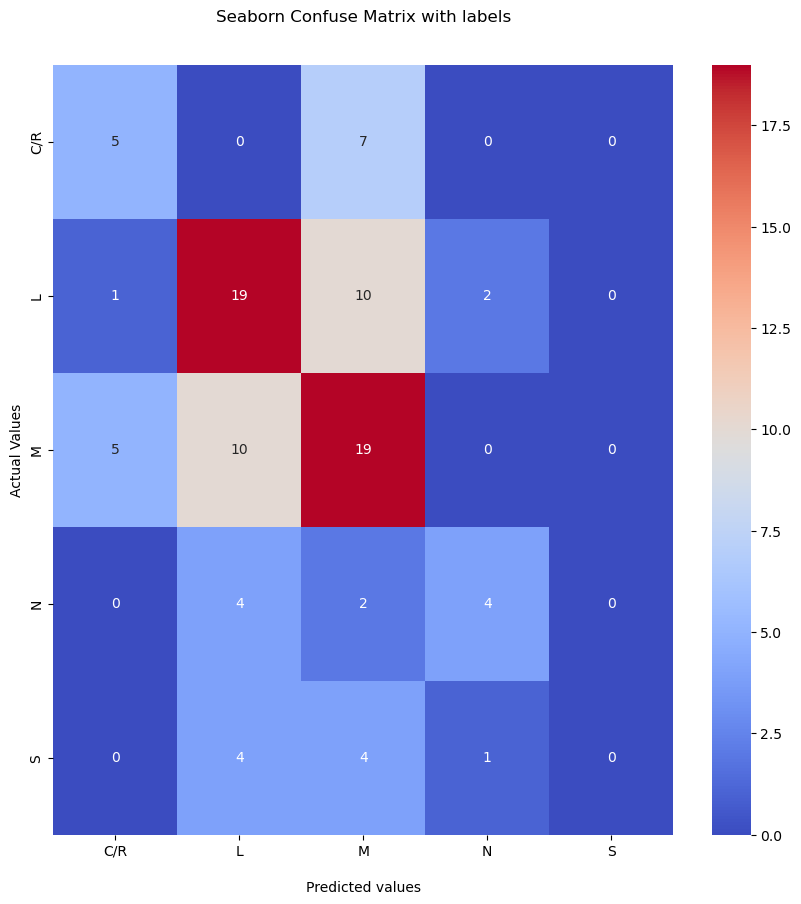

In [63]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='.0f',
                xticklabels=labels, yticklabels=labels)

ax.set_title('Seaborn Confuse Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual Values');

# XGBoost


In [64]:
from xgboost import XGBClassifier

In [65]:
xgb = XGBClassifier(objective='multi:softmax', max_depth=6, num_class=5, n_estimators=100, random_state=42, subsample=0.8)

In [66]:
# Fit the model

clf = xgb.fit(X_train, y_train)

In [67]:
# Predict the unseen data

y_pred = clf.predict(X_test)

In [68]:
clf.get_params()

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 5}

In [69]:
# accuracy score

accuracy_score(y_test, y_pred)

0.4639175257731959

In [70]:
# Hyperparameter Tuning and Cross Validation

param_dict = {'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.10],
             'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
             'max_depth': [5, 8, 10, 15]
             }
print(param_dict)

{'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5], 'max_depth': [5, 8, 10, 15]}


In [71]:
from sklearn.model_selection import GridSearchCV

dt_grid = GridSearchCV(estimator = XGBClassifier(),
                      param_grid = param_dict,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)

In [72]:
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1],
                         'max_depth': [5, 8, 10, 15]},
             verbose=2)

In [73]:
dt_grid.best_params_


{'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 15}

In [74]:
dt_grid.best_score_

0.5285714285714286

In [75]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.48      0.34      0.40        32
           2       0.46      0.56      0.51        34
           3       0.42      0.50      0.45        10
           4       0.30      0.33      0.32         9

    accuracy                           0.46        97
   macro avg       0.46      0.46      0.46        97
weighted avg       0.47      0.46      0.46        97



In [76]:
# Confusion Matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 7  0  5  0  0]
 [ 0 11 14  4  3]
 [ 4  6 19  2  3]
 [ 0  4  0  5  1]
 [ 0  2  3  1  3]]


In [77]:
labels = ['C/R', 'L', 'M', 'N', 'S']
labels.sort()

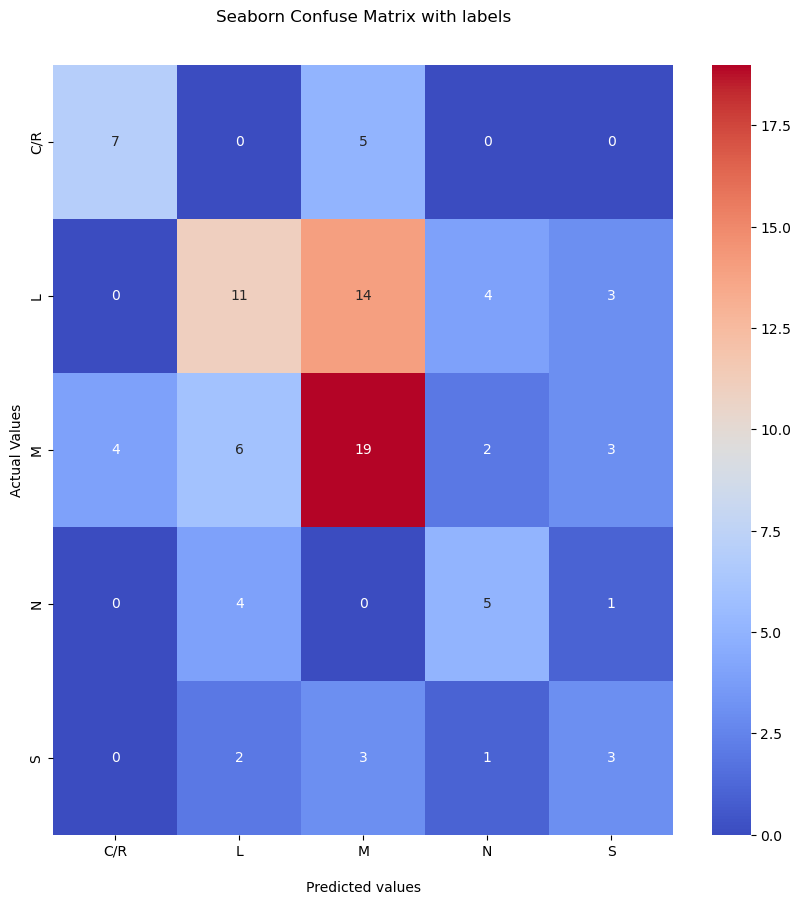

In [78]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='.0f',
                xticklabels=labels, yticklabels=labels)

ax.set_title('Seaborn Confuse Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual Values');

# Feature Importance

In [79]:
feature_names = X_train.columns
feature_names

Index(['Building_height', 'Building_age', 'Torsional_irregularity',
       'Projection_in_plan', 'Minimum_normalized_lateral_stiffness_index',
       'Minimum_normalized_lateral_strength_index', 'Overhanging_ratio',
       'Normalized_redundancy_score', 'Priority_index', 'PGA', 'PGV/PGA',
       'Effective_SaT1'],
      dtype='object')

In [80]:
clf.feature_importances_

array([0.08464705, 0.07305799, 0.07245166, 0.0610663 , 0.06086462,
       0.06343207, 0.05972541, 0.10380431, 0.07762781, 0.15733728,
       0.12766448, 0.05832104], dtype=float32)

In [81]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
PGA,0.157337
PGV/PGA,0.127664
Normalized_redundancy_score,0.103804
Building_height,0.084647
Priority_index,0.077628
Building_age,0.073058
Torsional_irregularity,0.072452
Minimum_normalized_lateral_strength_index,0.063432
Projection_in_plan,0.061066
Minimum_normalized_lateral_stiffness_index,0.060865


In [82]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['PGA',
 'PGV/PGA',
 'Normalized_redundancy_score',
 'Building_height',
 'Priority_index',
 'Building_age',
 'Torsional_irregularity',
 'Minimum_normalized_lateral_strength_index',
 'Projection_in_plan',
 'Minimum_normalized_lateral_stiffness_index',
 'Overhanging_ratio',
 'Effective_SaT1']

<Axes: >

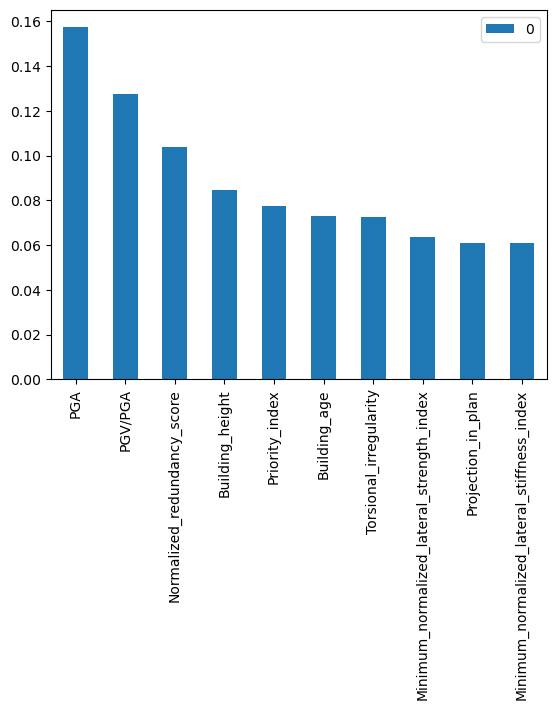

In [83]:
feature_importance.head(10).plot(kind='bar')